In [5]:
import pandas as pd
import numpy as np

In [6]:
mean_germ_score_pctmut_balm = pd.read_csv("./jaffe_paired_test_mean_germline_scores_balm.csv")
mean_germ_score_pctmut_moe = pd.read_csv("./jaffe_paired_test_mean_germline_scores_balmMoE.csv")
mean_germ_score_pctmut_moe['mean_mut_score'] = 1 - mean_germ_score_pctmut_moe['mean_germ_score']
mean_germ_score_pctmut_balm['mean_mut_score'] = 1 - mean_germ_score_pctmut_balm['mean_germ_score']

In [7]:
mean_germ_score_pctmut_moe = mean_germ_score_pctmut_moe[mean_germ_score_pctmut_moe['mean_mut_score'] < 0.4]
mean_germ_score_pctmut_balm = mean_germ_score_pctmut_balm[mean_germ_score_pctmut_balm['mean_mut_score'] < 0.4]

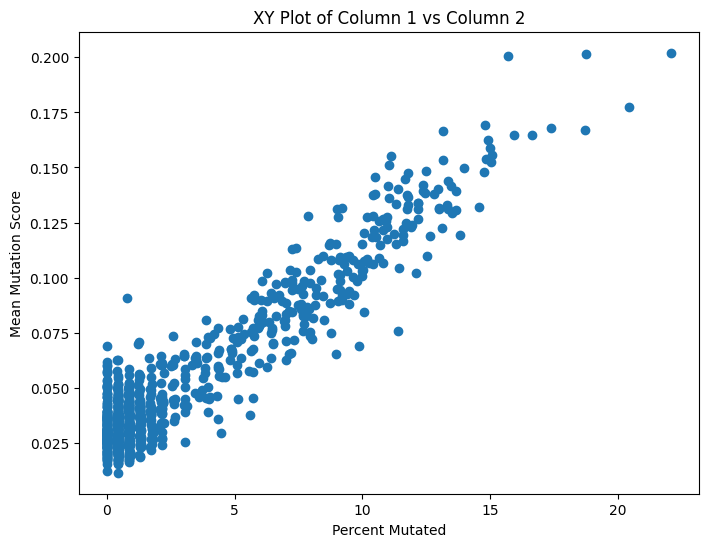

In [8]:
import matplotlib.pyplot as plt
mean_germ_score_pctmut_moe = mean_germ_score_pctmut_moe[mean_germ_score_pctmut_moe['mean_germ_score'] > 0.55]
# Assuming you have a DataFrame 'df' with columns 'column1' and 'column2'
plt.figure(figsize=(8, 6))
plt.scatter(mean_germ_score_pctmut_balm['percent_mutated'], mean_germ_score_pctmut_balm['mean_mut_score'])

# Adding labels and title
plt.ylabel('Mean Mutation Score')
plt.xlabel('Percent Mutated')
plt.title('XY Plot of Column 1 vs Column 2')

# Show plot
plt.show()


0.008802600271053384 0.03015134520742971 0.9489058525241288 0.0 9.270886943079412e-05
0.008213738987296876 0.02805135618418161 0.9454485105282442 0.0 8.963314062376396e-05


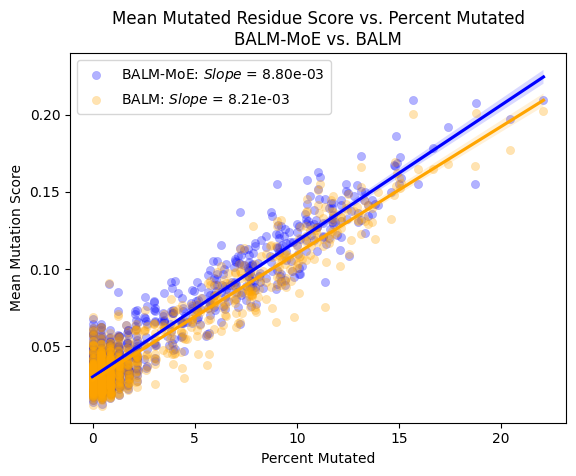

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Assuming you have a DataFrame 'df' with columns 'column1' and 'column2'
y = mean_germ_score_pctmut_moe['mean_mut_score']
y2 = mean_germ_score_pctmut_balm['mean_mut_score']
x = mean_germ_score_pctmut_moe['percent_mutated']
x2 = mean_germ_score_pctmut_balm['percent_mutated']

# Calculate the regression line and r-squared value
slope, intercept, r_value, p_value, std_err = linregress(x, y)
r_squared = r_value**2
slope2, intercept2, r_value2, p_value2, std_err2 = linregress(x2, y2)
print(slope, intercept, r_value, p_value, std_err)
print(slope2, intercept2, r_value2, p_value2, std_err2)
sns.regplot(x=x, y=y, scatter_kws={"color": "blue", "alpha":0.3, "linewidths": .3}, line_kws={"color": "blue"}, label=f'BALM-MoE: $Slope$ = {slope:.2e}')

# Second scatter plot with regression line (orange points, orange line)
sns.regplot(x=x2, y=y2, scatter_kws={"color": "orange", "alpha":0.3, "linewidths": .3}, line_kws={"color": "orange"}, label=f'BALM: $Slope$ = {slope2:.2e}')

# Add labels and title
plt.ylabel('Mean Mutation Score')
plt.xlabel('Percent Mutated')
plt.title('Mean Mutated Residue Score vs. Percent Mutated\nBALM-MoE vs. BALM')
plt.legend()
plt.savefig('./mean_mut_score_pctmut_BALM_BALMMoE.pdf')
# Show plot
plt.show()
# Show plot


In [10]:
import numpy as np
from scipy import stats

t_stat = (slope - slope2) / np.sqrt(std_err**2 + std_err2**2)

# Degrees of freedom (approximation)
df = len(mean_germ_score_pctmut_moe) + len(mean_germ_score_pctmut_balm) - 4  # Subtract 4 because each regression uses 2 parameters

# Calculate the p-value
p_value = 2 * (1 - stats.t.cdf(np.abs(t_stat), df=df))

print(f"t-statistic: {t_stat:.3f}")
print(f"p-value: {p_value:.5f}")

# Interpretation
if p_value < 0.05:
    print("The slopes are significantly different.")
else:
    print("The slopes are not significantly different.")

t-statistic: 4.566
p-value: 0.00001
The slopes are significantly different.


In [11]:
t_statistic, p_value = stats.ttest_ind(y, y2)

# Output the results
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

T-statistic: 2.365966988036794
P-value: 0.018078099349109387
